#### TP1 -- #Grupo 17
# Analisis de Datos

### Analisis Cuantitativo 
    En esta seccion para analizar la diferencia del error absoluto entre Colley y los test de la catedra vamos a utilizar pandas para crear un dataframe y visualizar esta distribucion en un boxplot con seaborn. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import filecmp
from IPython.display import display, HTML

In [2]:
def dif_de_error(dir,color):
    df = pd.read_csv(f"{dir}.expected", sep=" ", names=["Catedra"])
    df_2 = pd.read_csv(f"{dir}.out", sep=" ", header=None, names=["Colley"])
    df['Colley'] = df_2["Colley"]
    df['Diferencia absoluta'] = abs(df['Catedra']-df['Colley'])
    name = dir.split('/')[-1]
    #A partir de aca graficamos
    my_colors = [color]
    sns.set_palette(sns.color_palette(my_colors))
    sns.set_style("whitegrid")
    ax = sns.boxplot(y=df["Diferencia absoluta"])
    ax.set_title(name)
    fig = ax.get_figure()
    fig.savefig(f"graficos/{name}.png")
    plt.show()
    print('La diferencia de caso: '+ name +' tiene un promedio de ' + str(df['Diferencia absoluta'].mean()) + ', una mediana de ' + str(df['Diferencia absoluta'].median()) +  ' y una desviacion de ' + str(df['Diferencia absoluta'].std()))

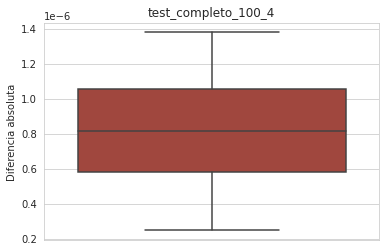

La diferencia de caso: test_completo_100_4 tiene un promedio de 8.263856107071366e-07, una mediana de 8.14856525033214e-07 y una desviacion de 3.0171526360237124e-07


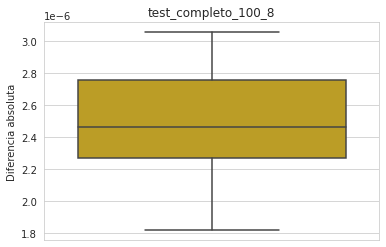

La diferencia de caso: test_completo_100_8 tiene un promedio de 2.497623989591857e-06, una mediana de 2.462933029939718e-06 y una desviacion de 3.1429794676589965e-07


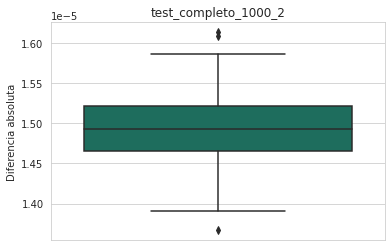

La diferencia de caso: test_completo_1000_2 tiene un promedio de 1.4932965938340648e-05, una mediana de 1.4922529980004873e-05 y una desviacion de 3.745875126227256e-07


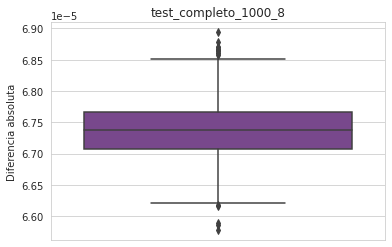

La diferencia de caso: test_completo_1000_8 tiene un promedio de 6.738384033064066e-05, una mediana de 6.737821289498624e-05 y una desviacion de 4.533636226283224e-07


In [3]:
tests = [("test_completos/test_completo_100_4", "#B03A2E" ),
         ("test_completos/test_completo_100_8", "#D4AC0D"),
         ("test_completos/test_completo_1000_2", "#117A65"),
         ("test_completos/test_completo_1000_8", "#7D3C98")]
for test in tests:
    dif_de_error(test[0],test[1])


### Generar cuadros comparativos entre metodos
    En esta seccion vamos a unir los resultados de los experimentos para visualizar como el metodo afecta un ranking

In [4]:
df_CMM = open('nba/nba_2016_scores_0.out', 'r').readlines()
df_WP = open('nba/nba_2016_scores_1.out', 'r').readlines()
df_SR = open('nba/nba_2016_scores_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NBA = pd.read_csv('../data/nba_2016_teams.csv', names=['team'])

df_NBA.insert(1, 'CMM', columnCMM)
df_NBA.insert(2, 'WP', columnWP)
df_NBA.insert(3, 'SR', columnSR)
display(df_NBA)

,team,CMM,WP,SR
1,Atlanta,0.558822,0.567164,0.017241
2,Boston,0.565690,0.582090,0.019611
3,Brooklyn,0.290736,0.283582,-0.031134
4,Charlotte,0.558224,0.560606,0.010848
5,Chicago,0.516007,0.507692,-0.006439
6,Cleveland,0.692428,0.712121,0.031051
7,Dallas,0.502178,0.507463,-0.001540
8,Denver,0.420858,0.411765,-0.010443
9,Detroit,0.500250,0.507463,0.002372
10,Golden_State,0.874063,0.909091,0.050336


### Orden por Colley

In [5]:
df_NBA.sort_values(by=['CMM'], ascending=False, inplace=True)
display(df_NBA)

,team,CMM,WP,SR
10,Golden_State,0.874063,0.909091,0.050336
27,San_Antonio,0.803976,0.850746,0.063394
6,Cleveland,0.692428,0.712121,0.031051
28,Toronto,0.659347,0.681818,0.022903
21,Oklahoma_City,0.655552,0.671642,0.032678
13,LA_Clippers,0.629708,0.636364,0.018105
16,Miami,0.577367,0.582090,0.005892
2,Boston,0.565690,0.582090,0.019611
15,Memphis,0.563176,0.582090,-0.007245
1,Atlanta,0.558822,0.567164,0.017241


### Orden por WP

In [6]:
df_NBA.sort_values(by=['WP'], ascending=False, inplace=True)
display(df_NBA)

,team,CMM,WP,SR
10,Golden_State,0.874063,0.909091,0.050336
27,San_Antonio,0.803976,0.850746,0.063394
6,Cleveland,0.692428,0.712121,0.031051
28,Toronto,0.659347,0.681818,0.022903
21,Oklahoma_City,0.655552,0.671642,0.032678
13,LA_Clippers,0.629708,0.636364,0.018105
16,Miami,0.577367,0.582090,0.005892
2,Boston,0.565690,0.582090,0.019611
15,Memphis,0.563176,0.582090,-0.007245
1,Atlanta,0.558822,0.567164,0.017241


### Orden por SR

In [7]:
df_NBA.sort_values(by=['SR'], ascending=False, inplace=True)
display(df_NBA)

,team,CMM,WP,SR
27,San_Antonio,0.803976,0.850746,0.063394
10,Golden_State,0.874063,0.909091,0.050336
21,Oklahoma_City,0.655552,0.671642,0.032678
6,Cleveland,0.692428,0.712121,0.031051
28,Toronto,0.659347,0.681818,0.022903
2,Boston,0.565690,0.582090,0.019611
13,LA_Clippers,0.629708,0.636364,0.018105
1,Atlanta,0.558822,0.567164,0.017241
4,Charlotte,0.558224,0.560606,0.010848
12,Indiana,0.547962,0.537313,0.007134


In [8]:
df_NBA_rankings = df_NBA.drop(['team'],axis=1)
df_NBA_rankings["CMM"] = df_NBA.sort_values(by=['CMM'], ascending=False)['team']
df_NBA_rankings["WP"] = df_NBA.sort_values(by=['WP'], ascending=False)['team']
df_NBA_rankings["SR"] = df_NBA.sort_values(by=['SR'], ascending=False)['team']
display(df_NBA_rankings)

,CMM,WP,SR
27,San_Antonio,San_Antonio,San_Antonio
10,Golden_State,Golden_State,Golden_State
21,Oklahoma_City,Oklahoma_City,Oklahoma_City
6,Cleveland,Cleveland,Cleveland
28,Toronto,Toronto,Toronto
2,Boston,Boston,Boston
13,LA_Clippers,LA_Clippers,LA_Clippers
1,Atlanta,Atlanta,Atlanta
4,Charlotte,Charlotte,Charlotte
12,Indiana,Indiana,Indiana


## Experimento 1

In [11]:
df_CMM = open('dataset_adhoc/upset_nba_2016_scores_0.out', 'r').readlines()
df_WP = open('dataset_adhoc/upset_nba_2016_scores_1.out', 'r').readlines()
df_SR = open('dataset_adhoc/upset_nba_2016_scores_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NBA_upset = pd.read_csv('../data/nba_2016_teams.csv', names=['team'])

df_NBA_upset.insert(1, 'CMM', columnCMM)
df_NBA_upset.insert(2, 'WP', columnWP)
df_NBA_upset.insert(3, 'SR', columnSR)

df_NBA_rankings_upset = df_NBA_rankings
df_NBA_rankings_upset["CMM_U"] = df_NBA_upset.sort_values(by=['CMM'], ascending=False)['team']
df_NBA_rankings_upset["WP_U"] = df_NBA_upset.sort_values(by=['WP'], ascending=False)['team']
df_NBA_rankings_upset["SR_U"] = df_NBA_upset.sort_values(by=['SR'], ascending=False)['team']


#display(df_NBA_rankings)
display(df_NBA_rankings_upset)

df_NBA["CMM_U"] = df_NBA_upset['CMM']
df_NBA["WP_U"] = df_NBA_upset['WP']
df_NBA["SR_U"] = df_NBA_upset['SR']
display(df_NBA)


,CMM,WP,SR,CMM_U,WP_U,SR_U
27,San_Antonio,San_Antonio,San_Antonio,San_Antonio,San_Antonio,San_Antonio
10,Golden_State,Golden_State,Golden_State,Golden_State,Golden_State,Golden_State
21,Oklahoma_City,Oklahoma_City,Oklahoma_City,Oklahoma_City,Oklahoma_City,Oklahoma_City
6,Cleveland,Cleveland,Cleveland,Cleveland,Cleveland,Cleveland
28,Toronto,Toronto,Toronto,Toronto,Toronto,Toronto
2,Boston,Boston,Boston,Boston,Boston,Boston
13,LA_Clippers,LA_Clippers,LA_Clippers,LA_Clippers,LA_Clippers,LA_Clippers
1,Atlanta,Atlanta,Atlanta,Atlanta,Atlanta,Atlanta
4,Charlotte,Charlotte,Charlotte,Charlotte,Charlotte,Charlotte
12,Indiana,Indiana,Indiana,Indiana,Indiana,Indiana


,team,CMM,WP,SR,CMM_U,WP_U,SR_U
27,San_Antonio,0.803976,0.850746,0.063394,0.803982,0.850746,0.063394
10,Golden_State,0.874063,0.909091,0.050336,0.873861,0.909091,0.050336
21,Oklahoma_City,0.655552,0.671642,0.032678,0.655357,0.671642,0.032678
6,Cleveland,0.692428,0.712121,0.031051,0.678517,0.696970,0.029427
28,Toronto,0.659347,0.681818,0.022903,0.659356,0.681818,0.022903
2,Boston,0.565690,0.582090,0.019611,0.565709,0.582090,0.019611
13,LA_Clippers,0.629708,0.636364,0.018105,0.629704,0.636364,0.018105
1,Atlanta,0.558822,0.567164,0.017241,0.559214,0.567164,0.017241
4,Charlotte,0.558224,0.560606,0.010848,0.558032,0.560606,0.010848
12,Indiana,0.547962,0.537313,0.007134,0.547594,0.537313,0.007134


## Experimento 2


In [10]:
## Buscamos diferencias en los ratings al alterar el orden
def comparar():
    flag_diferencias = False
    datasets = ["nba/nba_2016_scores",
                "nfl/nfl_2019","atp/atp_matches_2015","nhl/nhl_2019"]
    for d in datasets:
        for i in range(3):
            #comparamos si el resultado es el mismo
            dir1=f'{d}_{i}.out'
            dir2=f'{d}_reversed_{i}.out'
            if (not filecmp.cmp(dir1,dir2,shallow=False) ):
                flag_diferencias = True
                print("Diferencias encontradas en ", dir1)
    if(not flag_diferencias):
        print("No se encontraron diferencias")

comparar()

Diferencias encontradas en  nba/nba_2016_scores_2.out
Diferencias encontradas en  nfl/nfl_2019_2.out
Diferencias encontradas en  nhl/nhl_2019_2.out
